# PHASE 2 PROJECT
ANN MAUREEN WANGUI NGINA

An Overview of the dataset

King County is located in the state of Washington in the United States. There were 2,269,675 people residing there as of the 2020 census, making it the 13th most populous county in the US and the most populous county in Washington.

One of the dataset's most noteworthy discoveries is that King County has a very large wealth gap, both within the county and in comparison to the state and national standards. 10% of the county's residents are poor, despite the fact that some of the richest people in the world live there. The average household income in Seattle, which is part of King County, is 89,675 dollars, or 49% more than the national average. The region's thriving tech sector is perhaps a contributing factor in this. Homes with prices ranging from 78,000 dollars to over 7 million dollars are included in the dataset.

In [75]:
#Importing all the necessary packages to use in the project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from statsmodels.formula.api import ols
import statsmodels.api as sm

In [76]:
#Loading the dataset that will be used for this project
data = pd.read_csv("kc_house_data.csv")
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [77]:
#dropping all the columns that we will not use in the project. 
#(followed the instructions on the suggesion of the columns to drop)
data.drop(['date', 'view', 'sqft_above', 'sqft_basement', 'yr_renovated', 'zipcode', 'lat', 'long', 
           'sqft_living15', 'sqft_lot15'], inplace = True, axis = 1)
data.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
0,7129300520,221900.0,3,1.00,1180,5650,1.0,NaN,3,7,1955
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,1951
2,5631500400,180000.0,2,1.00,770,10000,1.0,0.0,3,6,1933
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,1965
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,1987


We now get the subset of the data that we will use for the project

In [78]:
#Getting to understand our dataset, by identifying the different columns we have, the data type and the presence of null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           21597 non-null  int64  
 1   price        21597 non-null  float64
 2   bedrooms     21597 non-null  int64  
 3   bathrooms    21597 non-null  float64
 4   sqft_living  21597 non-null  int64  
 5   sqft_lot     21597 non-null  int64  
 6   floors       21597 non-null  float64
 7   waterfront   19221 non-null  float64
 8   condition    21597 non-null  int64  
 9   grade        21597 non-null  int64  
 10  yr_built     21597 non-null  int64  
dtypes: float64(4), int64(7)
memory usage: 1.8 MB


In [79]:
#Getting the summary statistics so as to understand our better in a more comprehensive way
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,3.409825,7.657915,1970.999676
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.650546,1.173200,29.375234
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,1.000000,3.000000,1900.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,3.000000,7.000000,1951.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,3.000000,7.000000,1975.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,4.000000,8.000000,1997.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,5.000000,13.000000,2015.000000


Some insights from the statistics are we can see that we have homes with 33 bedrooms. The price range as mentioned above ranges from 78000 dollars to 7.8 Million dollars. From the statistics we start getting a feel of the columns that are categorical such as waterfront.

# Missing Values

Missing values occur when someone fails to collect or record a value for a certain variable in a specific observation or made the decision not to do so. Missing values can obstruct several types of analysis, which is why they are an issue.Before performing any quantitative analysis, it is crucial to fill in any missing values so that we may better comprehend what our calculations actually mean.

In [80]:
#Getting the total number of missing values in each and every column
data.isna().sum()

id                0
price             0
bedrooms          0
bathrooms         0
sqft_living       0
sqft_lot          0
floors            0
waterfront     2376
condition         0
grade             0
yr_built          0
dtype: int64

In my data, the water front column has 19075 missing values. Water front has a value of 0 for no waterfront and a value of 1 for waterfront. Since the mode of Water Front is 0, I'll set all the missing values to 0.

In [81]:
data['waterfront'].value_counts()

0.0    19075
1.0      146
Name: waterfront, dtype: int64

In [82]:
data['waterfront'] = data['waterfront'].fillna(0).astype('float64')


# Exploring the Dataset

In [9]:
#Getting the count of the number of bedrooms for the different houses in the dataset
data['bedrooms'].value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

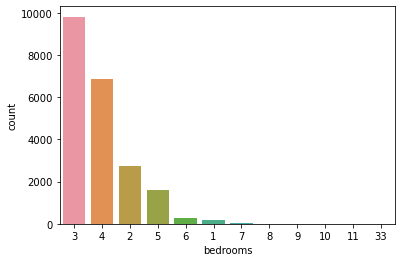

In [10]:
import warnings
warnings.filterwarnings("ignore")
sns.countplot(data['bedrooms'], order= data['bedrooms'].value_counts().index);

From the dataset it is quite evident that most houses in have an average of 3 bedrooms.

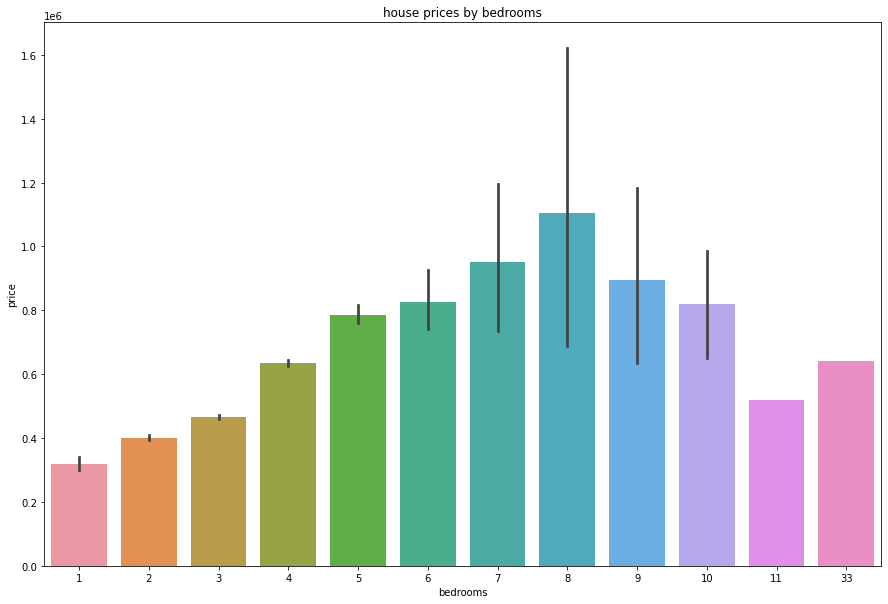

In [86]:
fig,axes=plt.subplots(figsize=(15,10))
plt.title("house prices by bedrooms")
plt.xlabel('bedrooms')
plt.ylabel('house prices')
sns.barplot(x='bedrooms',y='price',data=data);

The bargraph above proves that the number of bedrooms have an effect on the price but we cannot conclude that the higher the number of bedrooms the higher the price.

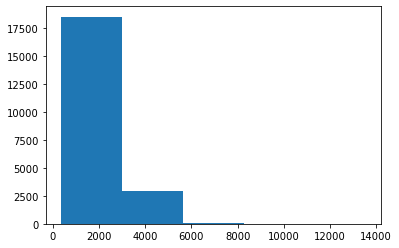

In [87]:
#Getting the distribution of sqft_living
plt.hist('sqft_living',data=data,bins=5);

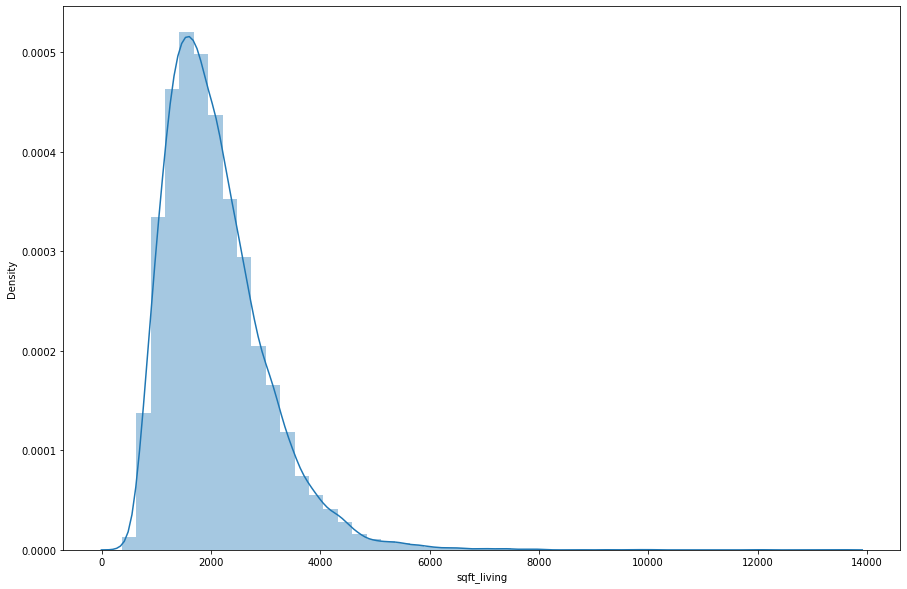

In [88]:
#Understanding the sqft_living column more by plotting a histogram and kde
fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(15,10))
sns.distplot(data['sqft_living'],hist=True,kde=True,label='sqft_living',norm_hist=True);

The plot above shows that the sqft_living has some positive skewness as the tail on the right is more extended.

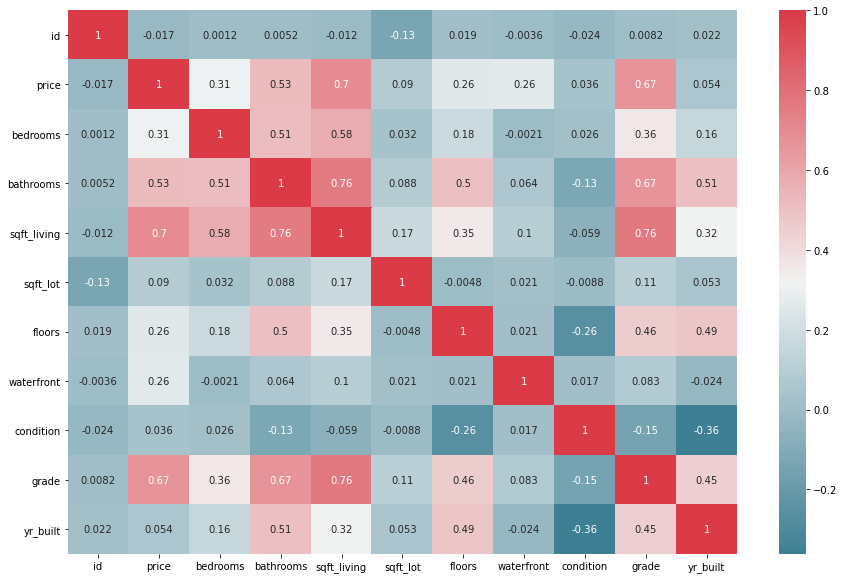

In [89]:
#We now identify the correlation between the different variables that we have using a heatmap
def correlation_heatmap(data1):
    _,ax=plt.subplots(figsize=(15,10))
    colormap=sns.diverging_palette(220,10,as_cmap=True)
    sns.heatmap(data1.corr(),annot=True,cmap=colormap)
    
correlation_heatmap(data)

On the heatmap, where we have values in red, this shows that that's where we have high correlations between variables example
sqft_living and bathrooms have a correlation of 0.76

In [90]:
#Identifying the highest correlated pair we have in our dataset
data1=data.corr().abs().stack().reset_index().sort_values(0, ascending=False)
data1['pairs'] = list(zip(data1.level_0, data1.level_1))
data1.set_index(['pairs'], inplace = True)
data1.drop(columns=['level_1', 'level_0'], inplace = True)
data1.columns = ['cc']
data1.drop_duplicates(inplace=True)

#Because a correlation of 0.70-0.80 and higher is regarded as high, the cut-off of 0.75 is utilized.
data1[(data1.cc>.75) & (data1.cc <1)]

,cc
pairs,
"(grade, sqft_living)",0.762779
"(sqft_living, bathrooms)",0.755758


There are two pairs of features high related with each other. The highest correlation is between sqft living and grade with a correlation of 0.762779, I will go ahead and drop one which is grade, so as to avoid issues brought up by highly correlated features.

In [91]:
data.drop(['grade'],axis = 1, inplace = True)
data.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,yr_built
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0.0,3,1955
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0.0,3,1951
2,5631500400,180000.0,2,1.00,770,10000,1.0,0.0,3,1933
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0.0,5,1965
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0.0,3,1987


We now go ahead and identify the cateforical variables in our dataset by the help of histograms.

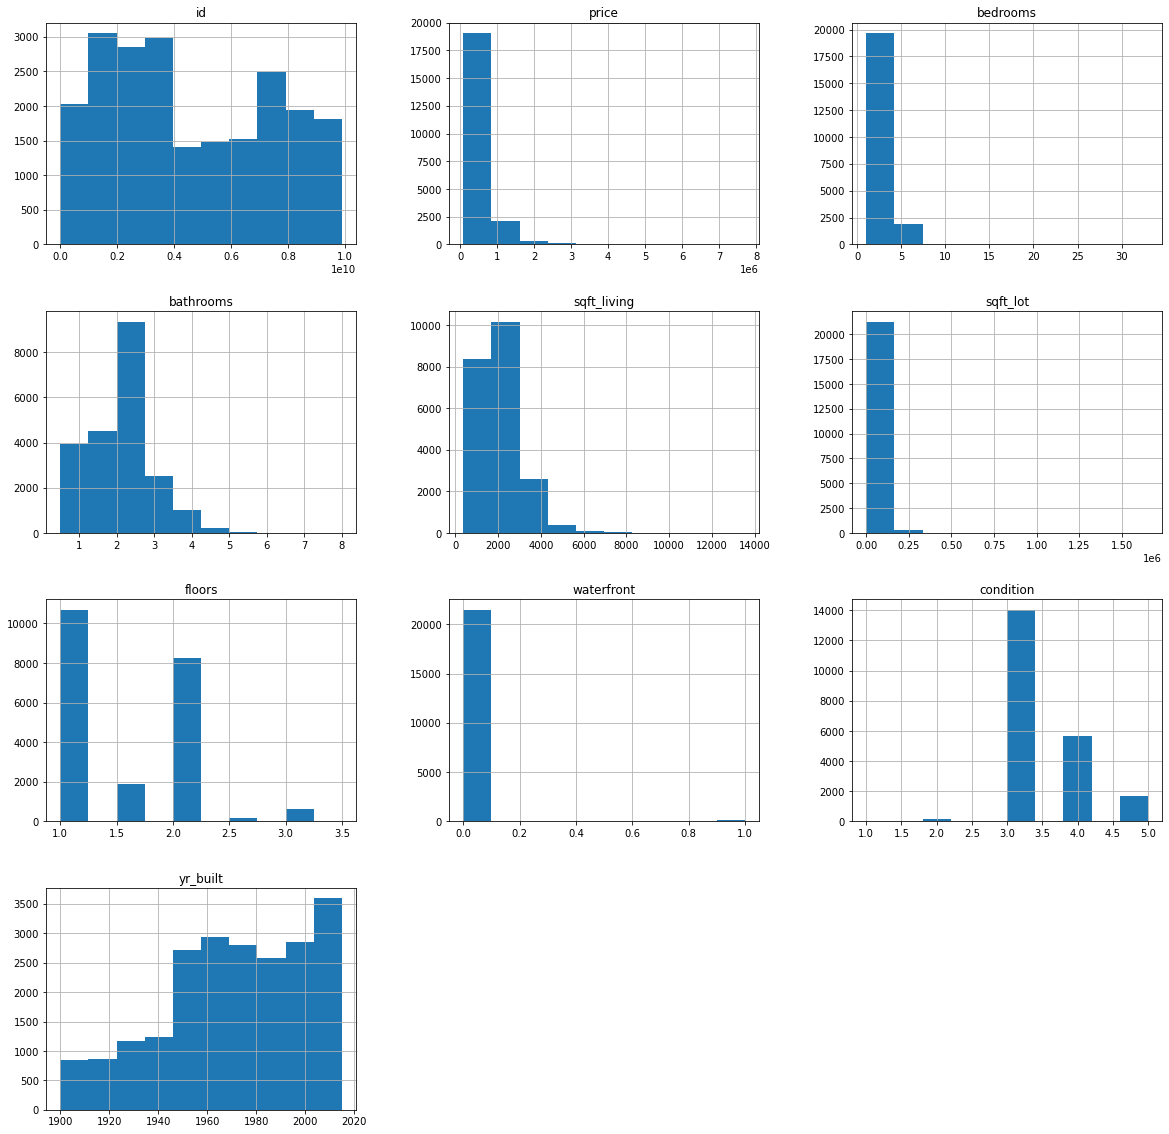

In [92]:
#Drawing the histogram for all the variables in the dataset
import warnings
warnings.filterwarnings('ignore')
fig = plt.figure(figsize = (20,20))
ax = fig.gca()
data.hist(ax = ax);

Based on the distribution of various variables using the histogram, we can identify that condition, waterfront and floors are categorical variables.
We therefore go ahead and identify the unique values in this variables.

In [93]:
#identifying the unique values in this variables
data[['condition','waterfront','floors']].nunique()

condition     5
waterfront    2
floors        6
dtype: int64

One-hot encoding, sometimes known as "dummy variables," is a different method of categorical variable transformation. The aim is to create a new column for each category and put a 1 or 0 in it. This helps when it comes to modelling the dataset.

In [19]:
#creating dummies for the categorical variables
condition_dummies = pd.get_dummies(data['condition'], prefix='condition', drop_first=True)
waterfront_dummies = pd.get_dummies(data['waterfront'], prefix='waterfront', drop_first=True)
floors_dummies = pd.get_dummies(data['floors'], prefix='floors', drop_first=True)

data = data.drop(['waterfront', 'condition', 'floors'], axis = 1)
data = pd.concat([data, condition_dummies, waterfront_dummies, floors_dummies], axis = 1)

data.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,yr_built,condition_2,condition_3,condition_4,condition_5,waterfront_1.0,floors_1.5,floors_2.0,floors_2.5,floors_3.0,floors_3.5
0,7129300520,221900.0,3,1.00,1180,5650,1955,0,1,0,0,0,0,0,0,0,0
1,6414100192,538000.0,3,2.25,2570,7242,1951,0,1,0,0,0,0,1,0,0,0
2,5631500400,180000.0,2,1.00,770,10000,1933,0,1,0,0,0,0,0,0,0,0
3,2487200875,604000.0,4,3.00,1960,5000,1965,0,0,0,1,0,0,0,0,0,0
4,1954400510,510000.0,3,2.00,1680,8080,1987,0,1,0,0,0,0,0,0,0,0


# REGRESSION

We start by training and test splitting the data. We will use the 80:20 ratio, where we will train 80% of the data and test 20% of the data

In [94]:
#train test splitting the data 80:20. We have to set the random seed so that we make the dataset reproducible
from sklearn.model_selection import train_test_split
y = data['price']
X = data.drop(['price'], axis  = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.2, random_state=10)
print(len(X_train), len(X_test), len(y_train), len(y_test))

17277 4320 17277 4320


The dataset has been split and we have 17277 values for the training dataset and 4320 for the testing dataset

In [95]:
#Creating the first model with OLS.
import statsmodels.api as sm
model = sm.OLS(y_train, sm.add_constant(X_train)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.586
Model:                            OLS   Adj. R-squared:                  0.585
Method:                 Least Squares   F-statistic:                     2712.
Date:                Wed, 06 Jul 2022   Prob (F-statistic):               0.00
Time:                        15:49:13   Log-Likelihood:            -2.3829e+05
No. Observations:               17277   AIC:                         4.766e+05
Df Residuals:                   17267   BIC:                         4.767e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        5.856e+06   1.56e+05     37.450      0.000    5.55e+06    6.16e+06
id          -4.691e-07   6.31e-07     -0.744      0.457   -1.71e-06    7.67e-07
bedrooms    -6.117e+04   2425.473    -25.218      0.000   -6.59e+04   -5.64e+04
bathrooms    6.175e+04   4167.941     14.816      0.000    5.36e+04    6.99e+04
sqft_living   291.7931      3.247     89.854      0.000     285.428     298.158
sqft_lot       -0.3030      0.044     -6.874      0.000      -0.389      -0.217
floors       5.666e+04   4130.211     13.719      0.000    4.86e+04    6.48e+04
waterfront   8.168e+05    2.2e+04     37.132      0.000    7.74e+05     8.6e+05
condition    1.732e+04   3014.249      5.748      0.000    1.14e+04    2.32e+04
yr_built    -3038.8902     79.297    -38.323      0.000   -3194.321   -2883.460
==============================================================================
Omnibus:                    10287.300   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           320656.997
Skew:                           2.329   Prob(JB):                         0.00
Kurtosis:                      23.585   Cond. No.                     4.70e+11
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.7e+11. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Results The coefficient of all the features demonstrates how each feature influences the price of a home. In a nutshell, the sqft living value for the size of the house was 291.7931, indicating that for every additional square foot of living space, the price of the home will rise by 291.7 dollars. The sqft lot and id, however, exhibited a negative correlation to the price of the home.We will go ahead and get rod of id column for the next model since it's pvalue has proven that it is not significant.
The amount of bedrooms had negative correlation on the price of the home. The price of a home will rise overall if it has more bathrooms, floors, waterfront, and other desirable features. The cost of the home will increase by 816800 if it has waterfront.

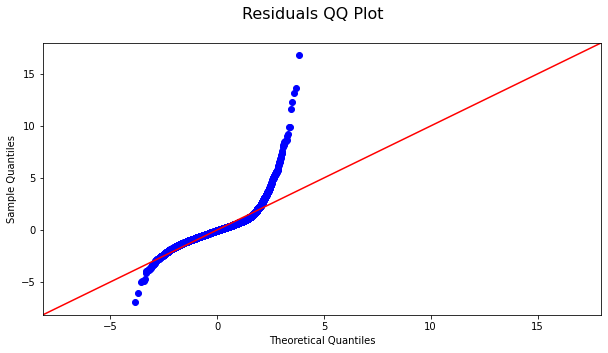

In [96]:
#Plotting a qqplot to check if the residuals have a normal distribution
residuals = model.resid
fig = sm.graphics.qqplot(residuals, line='45', fit=True)
fig.suptitle('Residuals QQ Plot', fontsize=16)
fig.set_size_inches(10, 5)
fig.show()

We can observe that the residuals defy the assumption of normalcy by not being normal.
We will now go ahead and look at our dependant variable to see if there are any problems we can fix.

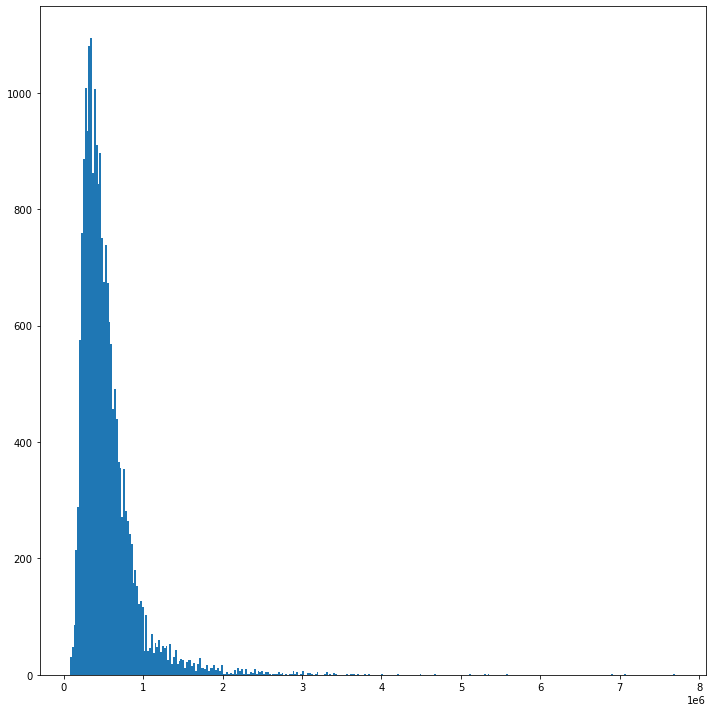

In [97]:
#Getting the distribution of price column
fig, ax = plt.subplots(figsize=(10,10))
ax.hist(x=data['price'], bins='auto')
ax.set_xscale('linear')
fig.tight_layout()

The price dataset is positively skewed as it is more on the left side

In [98]:
orig_tot = len(data)
data_red = data # Subsetting to remove extreme outliers
print('Percent removed:', (orig_tot -len(data))/orig_tot)
data_red.price = data.price.map(np.log) # Applying a log transformation
train, test = train_test_split(data)

Percent removed: 0.0


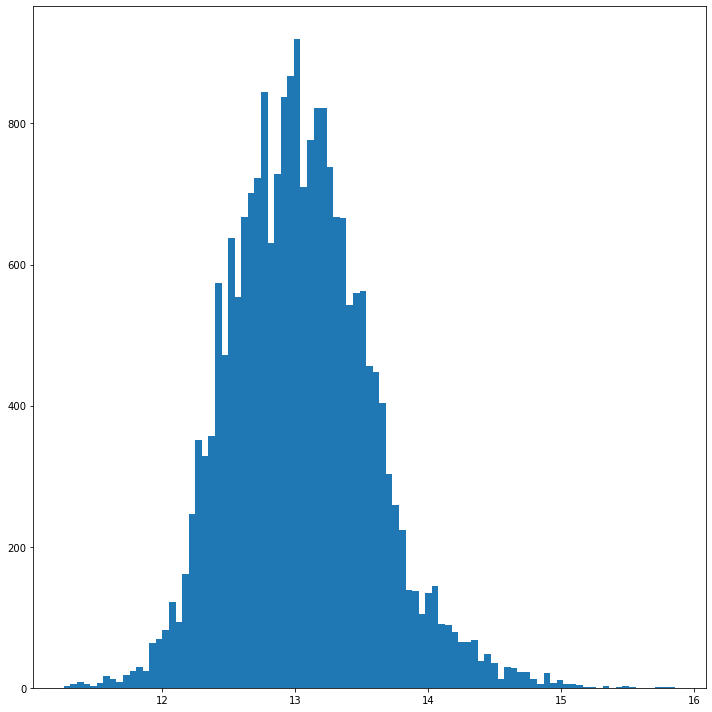

In [99]:
#Recheck if we have got rid of the skewness
fig, ax = plt.subplots(figsize=(10,10))
ax.hist(x=data['price'], bins='auto')
ax.set_xscale('linear')
fig.tight_layout()

The price data now has a normal distribution with veryy minute skewness.

In [108]:
#running the model again exclusive of id which didn't have any impact on the dataset
X_train.drop(['id'], axis = 1, inplace = True)
import statsmodels.api as sm
model = sm.OLS(y_train, sm.add_constant(X_train)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.548
Model:                            OLS   Adj. R-squared:                  0.548
Method:                 Least Squares   F-statistic:                     2451.
Date:                Wed, 06 Jul 2022   Prob (F-statistic):               0.00
Time:                        16:14:13   Log-Likelihood:                -6103.2
No. Observations:               16197   AIC:                         1.222e+04
Df Residuals:                   16188   BIC:                         1.229e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          20.6170      0.241     85.480      0.000      20.144      21.090
bedrooms       -0.0591      0.004    -15.893      0.000      -0.066      -0.052
bathrooms       0.1109      0.006     17.213      0.000       0.098       0.124
sqft_living     0.0004   5.03e-06     74.805      0.000       0.000       0.000
sqft_lot    -1.399e-07   6.98e-08     -2.005      0.045   -2.77e-07   -3.16e-09
floors          0.1438      0.006     22.660      0.000       0.131       0.156
waterfront      0.5268      0.035     15.246      0.000       0.459       0.595
condition       0.0431      0.005      9.292      0.000       0.034       0.052
yr_built       -0.0044      0.000    -36.278      0.000      -0.005      -0.004
==============================================================================
Omnibus:                       58.062   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               64.320
Skew:                          -0.106   Prob(JB):                     1.08e-14
Kurtosis:                       3.225   Cond. No.                     3.77e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.77e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The value for Rsquared now is at 0.548

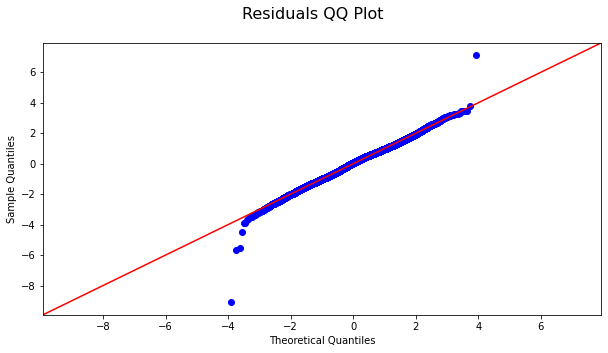

In [104]:
#Checking the distribution of the residuals using a qqplot
residuals1 = model1.resid
fig = sm.graphics.qqplot(residuals1, line='45', fit=True)
fig.suptitle('Residuals QQ Plot', fontsize=16)
fig.set_size_inches(10, 5)
fig.show()

The residuals now follow the normality assumption

# Model Validation

Model validation refers to the process of confirming that the model actually achieves its intended purpose. We will have a look at this by considering the mean squared error.

In [105]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

X = data.drop(["price"], axis=1)
y = data['price']
X_train, X_test, y_train, y_test = train_test_split(X, y)

linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test

train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squared Error:', train_mse)
print('Test Mean Squared Error:', test_mse)

Train Mean Squared Error: 0.12437533533132163
Test Mean Squared Error: 0.12568508002731016


We have not overfitted our model because there is not a significant difference between Train Mean Squared Error and Test Mean Squared Error, hence everything is fine. This implies that our model will function similarly on various sets of data.

# Conclusion and Recommendation

The coefficient of all the attributes shows how each attribute affects a home's price. In other words, the sqft living value for the size of the house was 291.7931, which means that the price of the home will increase by 291.7 dollars for every additional square foot of living space. However, the sqft lot and id showed a negative correlation to the cost of the house. Given that the pvalue of the id column has shown that it is not important.
The number of bedrooms was negatively correlated with the home's price.
If a house has additional bathrooms, floors, a beachfront, and other desirable features, its overall price will go up. If the residence has waterfront, the price will rise by 816800.
Our algorithm offers the seller some recommendations on how to raise the potential selling price. For instance, they could try to renovate the home, add a water view if they can, and increase the number of floors and bathrooms.